# House Price Prediction

## 1. Problem Definition

> Predicting housse price in Bengaluru

## 2. Data

> https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data

## 3. Evaluation

## 4.Data

1) area_type
2) availability
3) location
4) size
5) society
6) total_sqft
7) bath
8) balcony
9) price

## Preping required Libs

In [43]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

SyntaxError: invalid syntax (2566066499.py, line 6)

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

In [3]:
df.shape


(13320, 9)

## Data Preprocess

In [4]:
df["area_type"].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [7]:
df = df.dropna(subset=["size"])
df.isna().sum()


area_type          0
availability       0
location           1
size               0
society         5499
total_sqft         0
bath              57
balcony          593
price              0
dtype: int64

In [8]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [9]:
df.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  bhk  
0  Coomee        1056   2.0      1.0   39.07    2  
1  Theanmp       2600   5.0      3.0  120.00    4  
2      NaN       1440   2.0      3.0   62.00    3  
3  Soiewre       1521   3.0      1.0   95.00    3  
4      NaN       1200   2.0      1.0   51.00    2

In [10]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [11]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [12]:
df[~df["total_sqft"].apply(is_float)].head()

area_type availability            location       size  \
30   Super built-up  Area       19-Dec           Yelahanka      4 BHK   
56         Built-up  Area       20-Feb         Devanahalli  4 Bedroom   
81         Built-up  Area       18-Oct         Hennur Road  4 Bedroom   
122  Super built-up  Area       18-Mar              Hebbal      4 BHK   
137  Super built-up  Area       19-Mar  8th Phase JP Nagar      2 BHK   

     society   total_sqft  bath  balcony    price  bhk  
30   LedorSa  2100 - 2850   4.0      0.0  186.000    4  
56   BrereAt  3010 - 3410   NaN      NaN  192.000    4  
81   Gollela  2957 - 3450   NaN      NaN  224.500    4  
122  SNontle  3067 - 8156   4.0      0.0  477.000    4  
137  Vaarech  1042 - 1105   2.0      0.0   54.005    2

In [13]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return ((float(tokens[0])+float(tokens[1]))/2)
    try:
        return float(x)
    except:
        return None

In [14]:
df["total_sqft"] = df["total_sqft"].apply(convert_sqft_to_num)

In [16]:
df.head(10)

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   
5  Super built-up  Area  Ready To Move                Whitefield      2 BHK   
6  Super built-up  Area         18-May          Old Airport Road      4 BHK   
7  Super built-up  Area  Ready To Move              Rajaji Nagar      4 BHK   
8  Super built-up  Area  Ready To Move              Marathahalli      3 BHK   
9            Plot  Area  Ready To Move              Gandhi Bazar  6 Bedroom   

   society  total_sqft  bath  balcony   price  bhk  
0  Coomee       1056.0   2.0      1.0   39.07    2  
1  Theanmp      2600.0   5.0      3.0  120.00    4  
2      NaN      1440.0   2.0      3.0   62.00    3  
3  Soiewre      1521.0   3.0      1.0   95.00    3  
4      NaN      1200.0   2.0      1.0   51.00    2  
5  DuenaTa      1170.0   2.0      1.0   38.00    2  
6  Jaades       2732.0   4.0      NaN  204.00    4  
7  Brway G      3300.0   4.0      NaN  600.00    4  
8      NaN      1310.0   3.0      1.0   63.25    3  
9      NaN      1020.0   6.0      NaN  370.00    6

In [17]:
df1 = df.copy()
df1["price_per_sqft"] = df1["price"]*100000/df1["total_sqft"]
df1.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society  total_sqft  bath  balcony   price  bhk  price_per_sqft  
0  Coomee       1056.0   2.0      1.0   39.07    2     3699.810606  
1  Theanmp      2600.0   5.0      3.0  120.00    4     4615.384615  
2      NaN      1440.0   2.0      3.0   62.00    3     4305.555556  
3  Soiewre      1521.0   3.0      1.0   95.00    3     6245.890861  
4      NaN      1200.0   2.0      1.0   51.00    2     4250.000000

In [29]:
len(df1.location.unique())

1305

In [30]:
location_stats = df1.location.value_counts()

In [31]:
locations_stats_lessthan10 = (location_stats[location_stats<=10])

In [32]:
locations_stats_lessthan10

location
Dairy Circle         10
Kalkere              10
Dodsworth Layout     10
Sadashiva Nagar      10
Naganathapura        10
                     ..
Vidyapeeta            1
Maruthi Extension     1
Okalipura             1
Old Town              1
Abshot Layout         1
Name: count, Length: 1063, dtype: int64

In [34]:
df1.location = df1.location.apply(lambda x:"other" if x in locations_stats_lessthan10 else x)
len(df1.location.unique())

243

## Identifying Outliers

In [36]:
df1[df1.total_sqft/df.bhk<300].head()

area_type   availability       location       size society  total_sqft  \
9   Plot  Area  Ready To Move          other  6 Bedroom     NaN      1020.0   
45  Plot  Area  Ready To Move     HSR Layout  8 Bedroom     NaN       600.0   
58  Plot  Area  Ready To Move  Murugeshpalya  6 Bedroom     NaN      1407.0   
68  Plot  Area  Ready To Move          other  8 Bedroom     NaN      1350.0   
70  Plot  Area  Ready To Move          other  3 Bedroom     NaN       500.0   

    bath  balcony  price  bhk  price_per_sqft  
9    6.0      NaN  370.0    6    36274.509804  
45   9.0      NaN  200.0    8    33333.333333  
58   4.0      1.0  150.0    6    10660.980810  
68   7.0      0.0   85.0    8     6296.296296  
70   3.0      2.0  100.0    3    20000.000000

6 rooms and 600 sqft is unsual hence this is an outlier

In [37]:
df2 = df1[~(df1.total_sqft/df1.bhk<300)]
df2

area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
2            Built-up  Area  Ready To Move               Uttarahalli   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
4      Super built-up  Area  Ready To Move                  Kothanur   
...                     ...            ...                       ...   
13315        Built-up  Area  Ready To Move                Whitefield   
13316  Super built-up  Area  Ready To Move                     other   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   
13319  Super built-up  Area  Ready To Move              Doddathoguru   

            size  society  total_sqft  bath  balcony   price  bhk  \
0          2 BHK  Coomee       1056.0   2.0      1.0   39.07    2   
1      4 Bedroom  Theanmp      2600.0   5.0      3.0  120.00    4   
2          3 BHK      NaN      1440.0   2.0      3.0   62.00    3   
3          3 BHK  Soiewre      1521.0   3.0      1.0   95.00    3   
4          2 BHK      NaN      1200.0   2.0      1.0   51.00    2   
...          ...      ...         ...   ...      ...     ...  ...   
13315  5 Bedroom  ArsiaEx      3453.0   4.0      0.0  231.00    5   
13316      4 BHK      NaN      3600.0   5.0      NaN  400.00    4   
13317      2 BHK  Mahla T      1141.0   2.0      1.0   60.00    2   
13318      4 BHK  SollyCl      4689.0   4.0      1.0  488.00    4   
13319      1 BHK      NaN       550.0   1.0      1.0   17.00    1   

       price_per_sqft  
0         3699.810606  
1         4615.384615  
2         4305.555556  
3         6245.890861  
4         4250.000000  
...               ...  
13315     6689.834926  
13316    11111.111111  
13317     5258.545136  
13318    10407.336319  
13319     3090.909091  

[12560 rows x 11 columns]

In [39]:
df2.price_per_sqft.describe()

count     12514.000000
mean       6307.367132
std        4160.773691
min         267.829813
25%        4210.762120
50%        5295.073227
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [41]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df3 = remove_pps_outliers(df2)
df3.shape

(10289, 11)

### Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

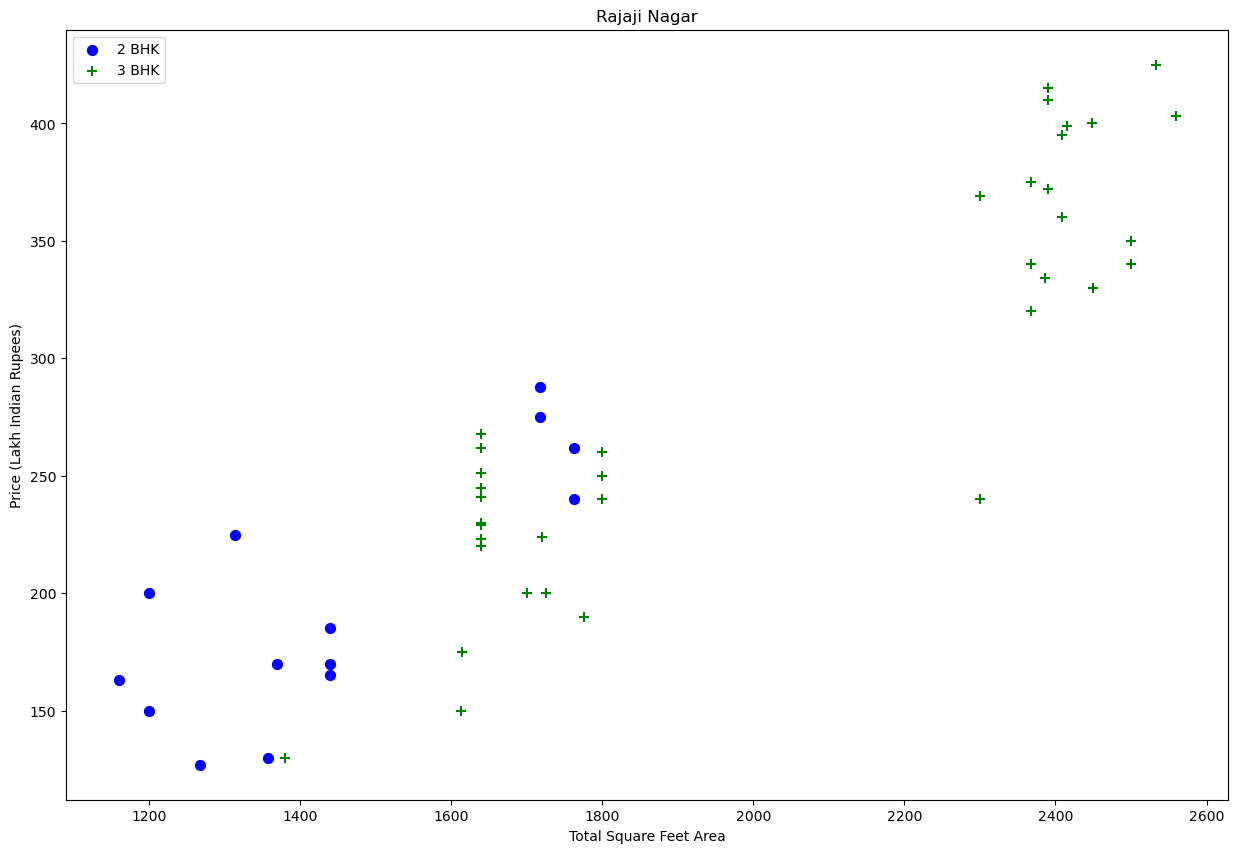

In [44]:
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df3,"Rajaji Nagar")

In [49]:
plot_scatter_chart(df3,"Hebbal")

In [45]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df4 = remove_bhk_outliers(df3)
df4.shape

(7365, 11)

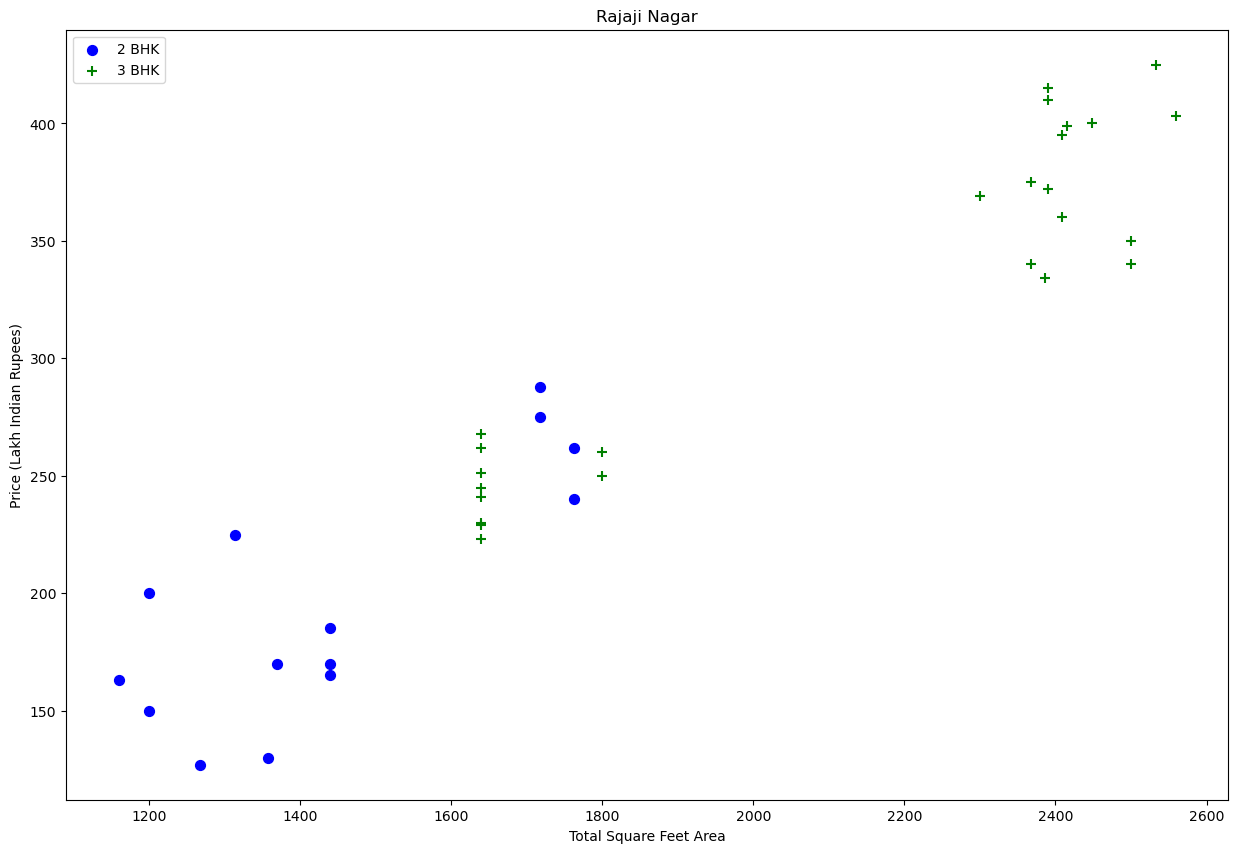

In [47]:
plot_scatter_chart(df4,"Rajaji Nagar")

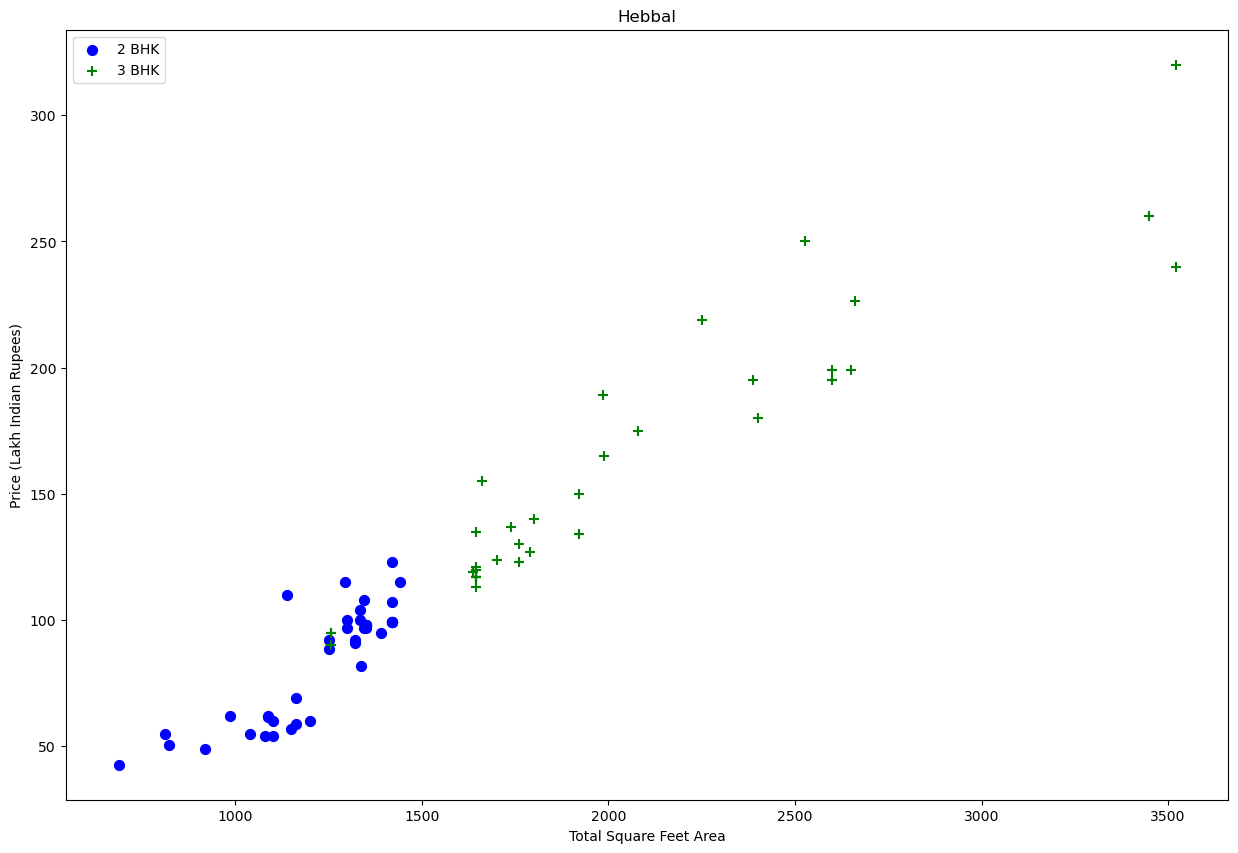

In [48]:
plot_scatter_chart(df4,"Hebbal")

Text(0, 0.5, 'count')

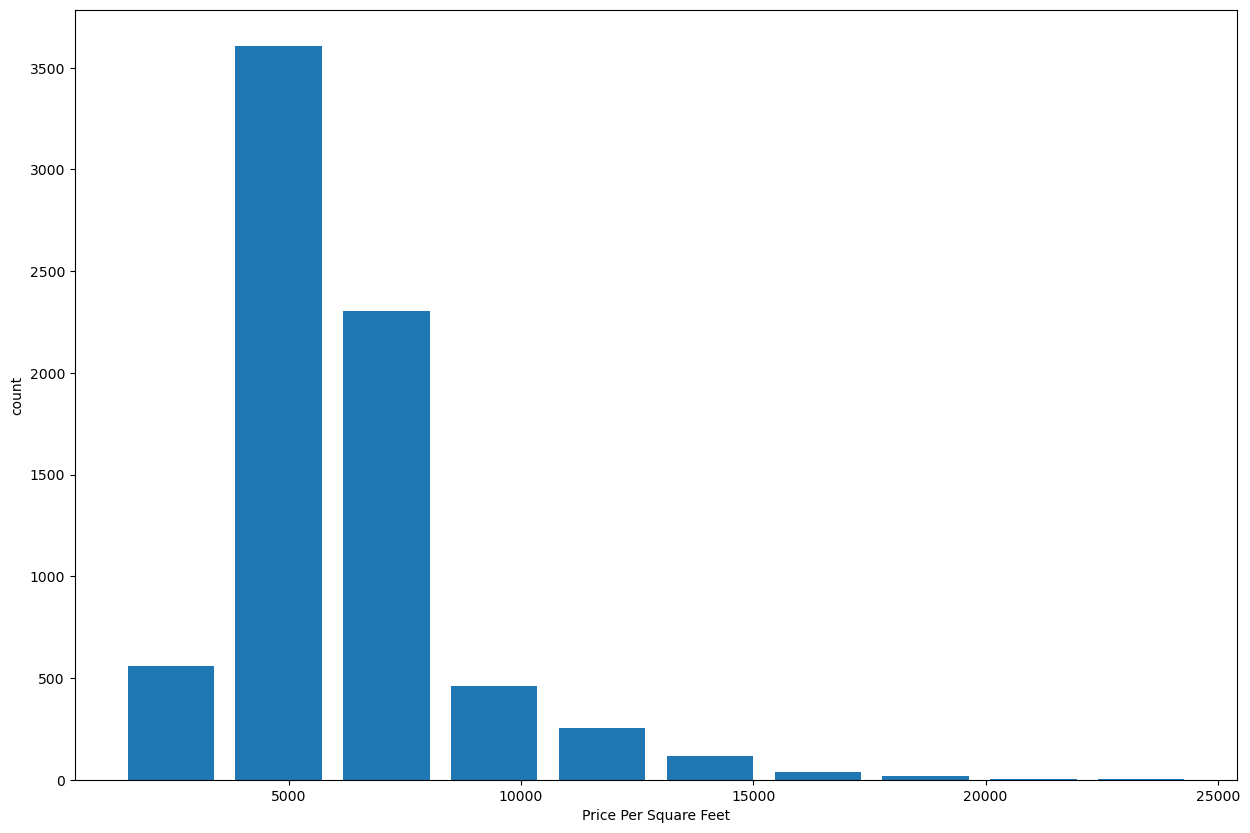

In [52]:
plt.hist(df4.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("count")

## Outlier Removal Using Bathrooms Feature

In [53]:
df4.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6., nan,  7.,  9., 12., 16., 13.])

In [55]:
plt.hist(df4.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

In [56]:
df4[df4.bath>10]

area_type   availability        location    size society  \
5300  Super built-up  Area  Ready To Move  Neeladri Nagar  10 BHK     NaN   
8525  Super built-up  Area  Ready To Move           other  10 BHK     NaN   
8614  Super built-up  Area  Ready To Move           other  16 BHK     NaN   
9353  Super built-up  Area  Ready To Move           other  11 BHK     NaN   
9685  Super built-up  Area  Ready To Move           other  13 BHK     NaN   

      total_sqft  bath  balcony  price  bhk  price_per_sqft  
5300      4000.0  12.0      NaN  160.0   10     4000.000000  
8525     12000.0  12.0      NaN  525.0   10     4375.000000  
8614     10000.0  16.0      NaN  550.0   16     5500.000000  
9353      6000.0  12.0      NaN  150.0   11     2500.000000  
9685      5425.0  13.0      0.0  275.0   13     5069.124424

#### It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [58]:
df4[df4.bath>df4.bhk+2]

area_type   availability       location       size  society  \
1645        Built-up  Area  Ready To Move  Chikkabanavar  4 Bedroom      NaN   
5261        Built-up  Area  Ready To Move     Nagasandra  4 Bedroom      NaN   
6739  Super built-up  Area  Ready To Move    Thanisandra      3 BHK  Soitya    
8449  Super built-up  Area  Ready To Move          other      6 BHK  Prowshi   

      total_sqft  bath  balcony   price  bhk  price_per_sqft  
1645      2460.0   7.0      2.0    80.0    4     3252.032520  
5261      7000.0   8.0      NaN   450.0    4     6428.571429  
6739      1806.0   6.0      2.0   116.0    3     6423.034330  
8449     11338.0   9.0      1.0  1000.0    6     8819.897689

In [59]:
df5 = df4[df4.bath<df4.bhk+2]
df5.shape

(7255, 11)

In [60]:
df6 = df5.drop(['size','price_per_sqft'],axis='columns')
df6.head(3)

area_type   availability              location  society  \
1  Super built-up  Area  Ready To Move   Devarachikkanahalli  Clntsrt   
2            Plot  Area  Ready To Move   Devarachikkanahalli      NaN   
3  Super built-up  Area  Ready To Move   Devarachikkanahalli      NaN   

   total_sqft  bath  balcony  price  bhk  
1      1250.0   2.0      2.0   40.0    2  
2      1200.0   2.0      2.0   83.0    2  
3      1170.0   2.0      2.0   40.0    2

In [62]:
df6 = df6.drop(["availability"],axis=1)
df6.head()

area_type              location  society  total_sqft  bath  \
1  Super built-up  Area   Devarachikkanahalli  Clntsrt      1250.0   2.0   
2            Plot  Area   Devarachikkanahalli      NaN      1200.0   2.0   
3  Super built-up  Area   Devarachikkanahalli      NaN      1170.0   2.0   
4  Super built-up  Area   Devarachikkanahalli  Shireru      1425.0   2.0   
5  Super built-up  Area   Devarachikkanahalli      NaN       947.0   2.0   

   balcony  price  bhk  
1      2.0   40.0    2  
2      2.0   83.0    2  
3      2.0   40.0    2  
4      2.0   65.0    3  
5      2.0   43.0    2

In [64]:
df6 = df6.drop(["society"],axis=1)

In [72]:
# Check for which numeric columns have null values
for label, content in df6.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
            print(label)

balcony


In [73]:
# Fill numeric rows with median
for label, content in df6.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
            # Fill missing values
            df6[label] = content.fillna(content.median())

In [75]:
df6.isna().sum()

area_type     0
location      0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [80]:
df7 = df6.copy()

In [82]:
df6["location"] = df6["location"].astype("category").cat.codes

1          0
2          0
3          0
4          0
5          0
        ... 
10280    241
10281    241
10284    241
10285    241
10288    241
Name: location, Length: 7255, dtype: int16

In [88]:
df6["area_type"] = df6["area_type"].astype("category").cat.codes

In [89]:
df6

area_type  location  total_sqft  bath  balcony  price  bhk
1              3         0      1250.0   2.0      2.0   40.0    2
2              2         0      1200.0   2.0      2.0   83.0    2
3              3         0      1170.0   2.0      2.0   40.0    2
4              3         0      1425.0   2.0      2.0   65.0    3
5              3         0       947.0   2.0      2.0   43.0    2
...          ...       ...         ...   ...      ...    ...  ...
10280          1       241      1200.0   2.0      3.0   70.0    2
10281          3       241      1800.0   1.0      1.0  200.0    1
10284          3       241      1353.0   2.0      2.0  110.0    2
10285          2       241       812.0   1.0      0.0   26.0    1
10288          3       241      3600.0   5.0      2.0  400.0    4

[7255 rows x 7 columns]

In [90]:
# x and y split
from sklearn.model_selection import train_test_split

x = df6.drop(["price"],axis=1)
y = df6["price"]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(random_state=42,n_jobs=-1)
clf.fit(xtrain,ytrain)
clf.score(xtest,ytest)

0.7167050239271842

In [108]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(RandomForestRegressor(), x, y, cv=cv)

array([0.7388603 , 0.78249128, 0.80137822, 0.80988092, 0.7804507 ])

In [118]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators":np.arange(100,1000,10),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,200,2),
           "min_samples_leaf":np.arange(1,200,2),
           "max_features":[0.5,1,"sqrt","auto","log2"],
           "bootstrap":[True,False]}

# Instantiate RadomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),
                              param_distributions=rf_grid,
                             n_iter=500,
                             cv=5,
                             verbose=True)
# Fit the randomizedsearchCV model
rs_model.fit(xtrain,ytrain)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


C:\Users\joela\Desktop\ML_course\bengaluru-house-price-prediction\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
485 fits failed out of a total of 2500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
485 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\joela\Desktop\ML_course\bengaluru-house-price-prediction\env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\joela\Desktop\ML_course\bengaluru-house-price-prediction\env\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\joela\Desktop\ML_course\bengal

CPU times: total: 4min 26s
Wall time: 14min


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=500,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt', 'auto',
                                                         'log2'],
                                        'min_samples_leaf': array([  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
        27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,  51,
        53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,
        79...
                                        'n_estimators': array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220,
       230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350,
       360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480,
       490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610,
       620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740,
       750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870,
       880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990])},
                   verbose=True)

{'n_estimators': 200,
 'min_samples_split': 4,
 'min_samples_leaf': 27,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': False}

In [120]:
rs_model.best_params_

{'n_estimators': 720,
 'min_samples_split': 48,
 'min_samples_leaf': 7,
 'max_features': 0.5,
 'max_depth': 10,
 'bootstrap': False}

In [119]:
rs_model.score(xtest,ytest)

0.7886597709495113

In [9]:
# # Find columns which contains strings
# for label, content in df.items():
#     if pd.api.types.is_object_dtype(content):
#         print(label)

area_type
availability
location
size
society
total_sqft


In [12]:
# # Turn all string values into category values
# for label, content in df.items():
#     if pd.api.types.is_object_dtype(content):
#         df[label] = content.astype("category").cat.as_ordered()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   area_type     13320 non-null  category
 1   availability  13320 non-null  category
 2   location      13319 non-null  category
 3   size          13304 non-null  category
 4   society       7818 non-null   category
 5   total_sqft    13320 non-null  category
 6   bath          13247 non-null  float64 
 7   balcony       12711 non-null  float64 
 8   price         13320 non-null  float64 
dtypes: category(6), float64(3)
memory usage: 642.7 KB


In [21]:
df.society.cat.codes

0         464
1        2439
2          -1
3        2186
4          -1
         ... 
13315     209
13316      -1
13317    1216
13318    2205
13319      -1
Length: 13320, dtype: int16

## Check missing data and filling them

In [24]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [28]:
# # Check for which numeric columns have null values
# for label, content in df.items():
#     if pd.api.types.is_numeric_dtype(content):
#         if pd.isna(content).sum():
#             print(label)

bath
balcony


In [30]:
# # Fill numeric rows with median
# for label, content in df.items():
#     if pd.api.types.is_numeric_dtype(content):
#         if pd.isna(content).sum():
#             # Fill missing values
#             df[label] = content.fillna(content.median())
            

In [31]:
# # Check for which numeric columns have null values
# for label, content in df.items():
#     if pd.api.types.is_numeric_dtype(content):
#         if pd.isna(content).sum():
#             print(label)

## Filling Categorical variables to numbers

In [33]:
# # Check for columns which aren't numeric
# for label, content in df.items():
#     if not pd.api.types.is_numeric_dtype(content):
#         print(label)

area_type
availability
location
size
society
total_sqft


In [36]:
# # Turn categorical variables into numebrs and fill missing values
# for label, content in df.items():
#     if not pd.api.types.is_numeric_dtype(content):
#         # Turn categories into numbers and add +1
#         df[label] = pd.Categorical(content).codes + 1

In [39]:
# df.isna().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64